In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("cities.csv")
dataset

,id,name,state_id,state_code,state_name,country_id,country_code,country_name,latitude,longitude,wikiDataId
0,52,Ashkāsham,3901,BDS,Badakhshan,1,AF,Afghanistan,36.68333,71.53333,Q4805192
1,68,Fayzabad,3901,BDS,Badakhshan,1,AF,Afghanistan,37.11664,70.58002,Q156558
2,78,Jurm,3901,BDS,Badakhshan,1,AF,Afghanistan,36.86477,70.83421,Q10308323
3,84,Khandūd,3901,BDS,Badakhshan,1,AF,Afghanistan,36.95127,72.31800,Q3290334
4,115,Rāghistān,3901,BDS,Badakhshan,1,AF,Afghanistan,37.66079,70.67346,Q2670909
...,...,...,...,...,...,...,...,...,...,...,...
148056,131496,Redcliff,1957,MI,Midlands Province,247,ZW,Zimbabwe,-19.03333,29.78333,Q584001
148057,131502,Shangani,1957,MI,Midlands Province,247,ZW,Zimbabwe,-19.78333,29.36667,Q32017959
148058,131503,Shurugwi,1957,MI,Midlands Province,247,ZW,Zimbabwe,-19.67016,30.00589,Q32019023
148059,131504,Shurugwi District,1957,MI,Midlands Province,247,ZW,Zimbabwe,-19.75000,30.16667,Q7505444


In [4]:
dataset.head()

,id,name,state_id,state_code,state_name,country_id,country_code,country_name,latitude,longitude,wikiDataId
0,52,Ashkāsham,3901,BDS,Badakhshan,1,AF,Afghanistan,36.68333,71.53333,Q4805192
1,68,Fayzabad,3901,BDS,Badakhshan,1,AF,Afghanistan,37.11664,70.58002,Q156558
2,78,Jurm,3901,BDS,Badakhshan,1,AF,Afghanistan,36.86477,70.83421,Q10308323
3,84,Khandūd,3901,BDS,Badakhshan,1,AF,Afghanistan,36.95127,72.31800,Q3290334
4,115,Rāghistān,3901,BDS,Badakhshan,1,AF,Afghanistan,37.66079,70.67346,Q2670909


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148061 entries, 0 to 148060
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            148061 non-null  int64  
 1   name          148061 non-null  object 
 2   state_id      148061 non-null  int64  
 3   state_code    148046 non-null  object 
 4   state_name    148061 non-null  object 
 5   country_id    148061 non-null  int64  
 6   country_code  148013 non-null  object 
 7   country_name  148061 non-null  object 
 8   latitude      148061 non-null  float64
 9   longitude     148061 non-null  float64
 10  wikiDataId    148030 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 12.4+ MB


In [6]:
dataset.describe()

,id,state_id,country_id,latitude,longitude
count,148061.000000,148061.000000,148061.000000,148061.000000,148061.000000
mean,74445.319807,2584.171713,140.393135,32.110302,2.278198
std,43073.189112,1319.381847,70.883390,22.649701,68.345756
min,1.000000,1.000000,1.000000,-75.000000,-179.121980
25%,37193.000000,1443.000000,82.000000,19.637220,-60.943750
50%,74301.000000,2059.000000,142.000000,40.880870,8.863830
75%,111962.000000,3742.000000,207.000000,47.316670,27.733330
max,149307.000000,5068.000000,247.000000,73.508190,179.466000


In [7]:
drop_wikiDataId=['wikiDataId']
dataset.drop(columns=drop_wikiDataId, inplace = True)
dataset.head()

,id,name,state_id,state_code,state_name,country_id,country_code,country_name,latitude,longitude
0,52,Ashkāsham,3901,BDS,Badakhshan,1,AF,Afghanistan,36.68333,71.53333
1,68,Fayzabad,3901,BDS,Badakhshan,1,AF,Afghanistan,37.11664,70.58002
2,78,Jurm,3901,BDS,Badakhshan,1,AF,Afghanistan,36.86477,70.83421
3,84,Khandūd,3901,BDS,Badakhshan,1,AF,Afghanistan,36.95127,72.31800
4,115,Rāghistān,3901,BDS,Badakhshan,1,AF,Afghanistan,37.66079,70.67346


In [8]:
# Calculate missing values percentage
missing_values = dataset.isnull().sum()
missing_percentage = (missing_values / len(dataset)) * 100

# Display missing values summary
missing_values
missing_percentage


id              0.000000
name            0.000000
state_id        0.000000
state_code      0.010131
state_name      0.000000
country_id      0.000000
country_code    0.032419
country_name    0.000000
latitude        0.000000
longitude       0.000000
dtype: float64

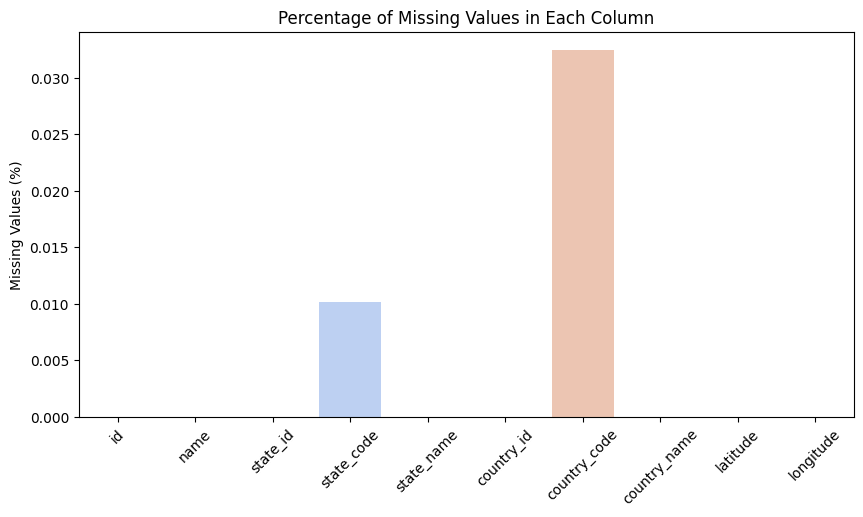

In [9]:
# # Plot missing values
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette="coolwarm")
plt.xticks(rotation=45)#, ha="right")
plt.ylabel("Missing Values (%)")
plt.title("Percentage of Missing Values in Each Column")
plt.show()

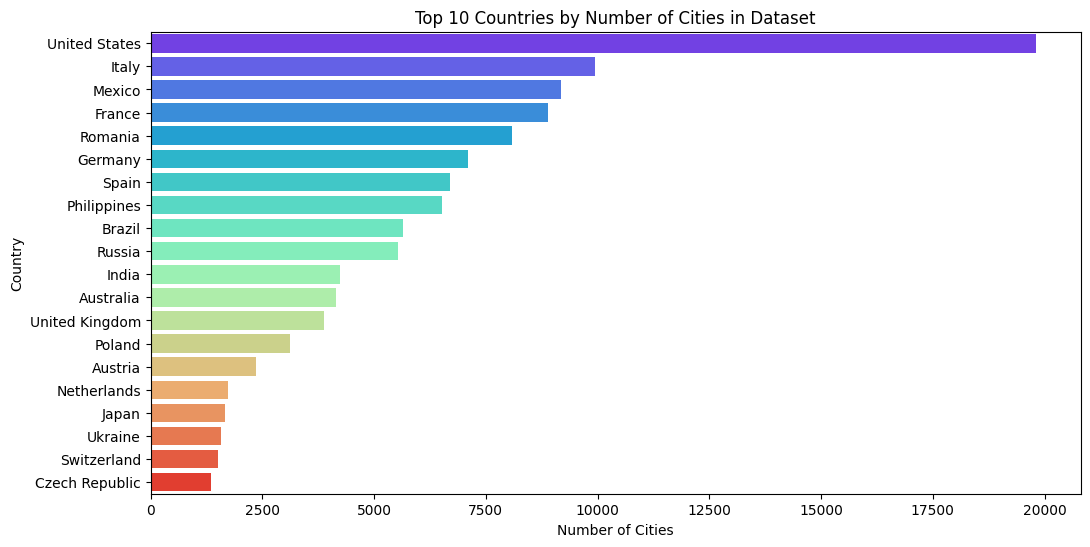

United States     19818
Italy              9948
Mexico             9174
France             8894
Romania            8081
Germany            7097
Spain              6692
Philippines        6520
Brazil             5640
Russia             5545
India              4241
Australia          4139
United Kingdom     3871
Poland             3126
Austria            2361
Netherlands        1740
Japan              1671
Ukraine            1569
Switzerland        1506
Czech Republic     1355
Name: country_name, dtype: int64

In [26]:
# Count the number of cities per country
top_countries = dataset["country_name"].value_counts().head(20)

# Plot the top countries
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="rainbow")
plt.xlabel("Number of Cities")
plt.ylabel("Country")
plt.title("Top 10 Countries by Number of Cities in Dataset")
plt.show()

# Display the top countries count
top_countries


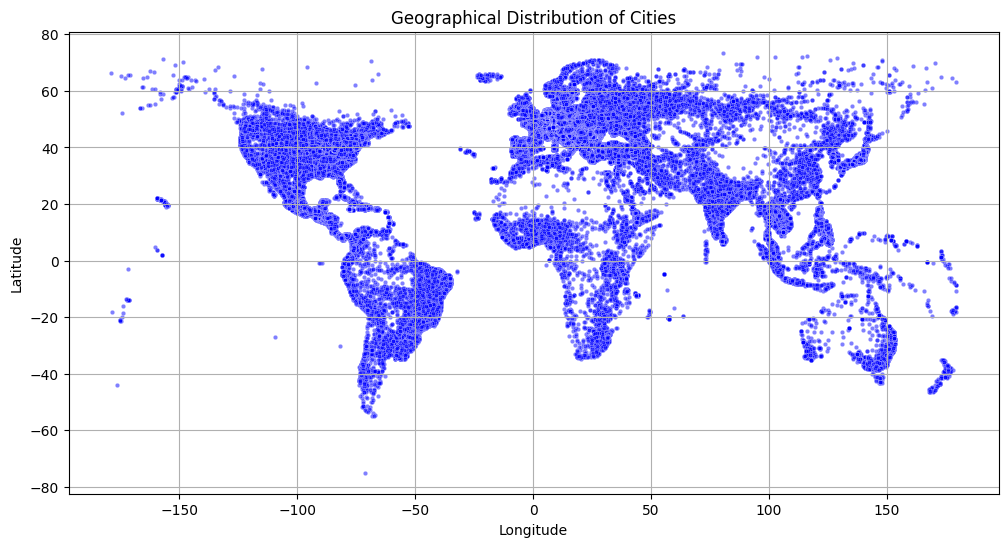

In [35]:
# Scatter plot of city locations
plt.figure(figsize=(12,6))
sns.scatterplot(x=dataset["longitude"], y=dataset["latitude"], alpha=0.5, s=10, color="blue")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Distribution of Cities")
plt.grid(True)
plt.show()


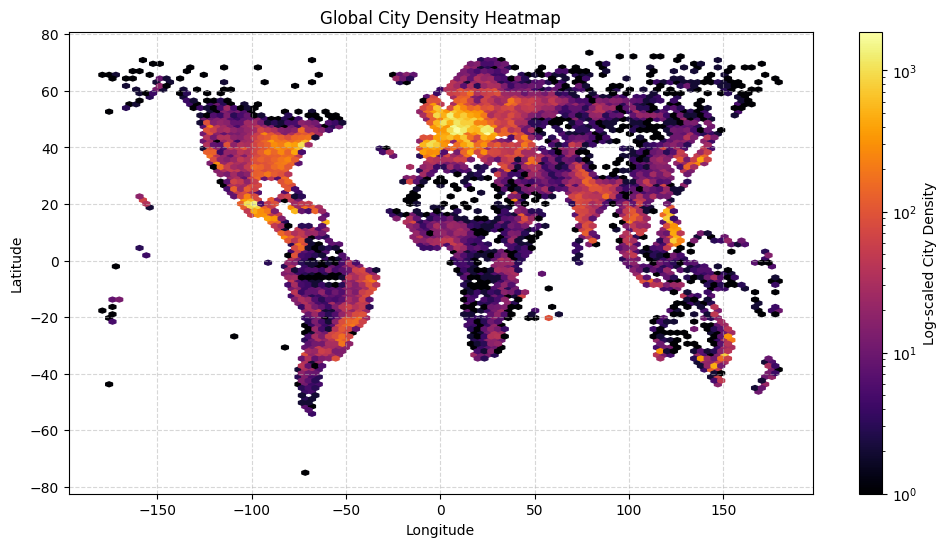

In [36]:
plt.figure(figsize=(12, 6))

# Create a 2D histogram (hexbin plot) for density visualization
plt.hexbin(dataset["longitude"], dataset["latitude"], gridsize=100, cmap="inferno", bins="log")

# Labels and title
plt.colorbar(label="Log-scaled City Density")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Global City Density Heatmap")
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()


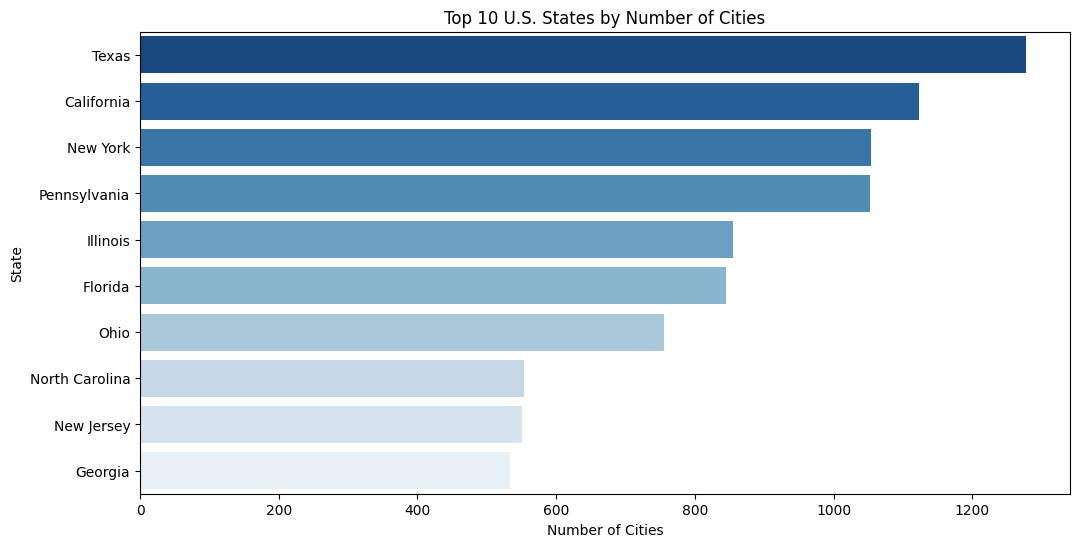

Texas             1277
California        1123
New York          1054
Pennsylvania      1053
Illinois           855
Florida            845
Ohio               756
North Carolina     554
New Jersey         550
Georgia            534
Name: state_name, dtype: int64

In [37]:
# Filter data for the United States
df_us = dataset[dataset["country_name"] == "United States"]

# Count the number of cities per state
top_states = df_us["state_name"].value_counts().head(10)

# Plot the top states by city count
plt.figure(figsize=(12, 6))
sns.barplot(x=top_states.values, y=top_states.index, palette="Blues_r")
plt.xlabel("Number of Cities")
plt.ylabel("State")
plt.title("Top 10 U.S. States by Number of Cities")
plt.show()

# Display the top states count
top_states


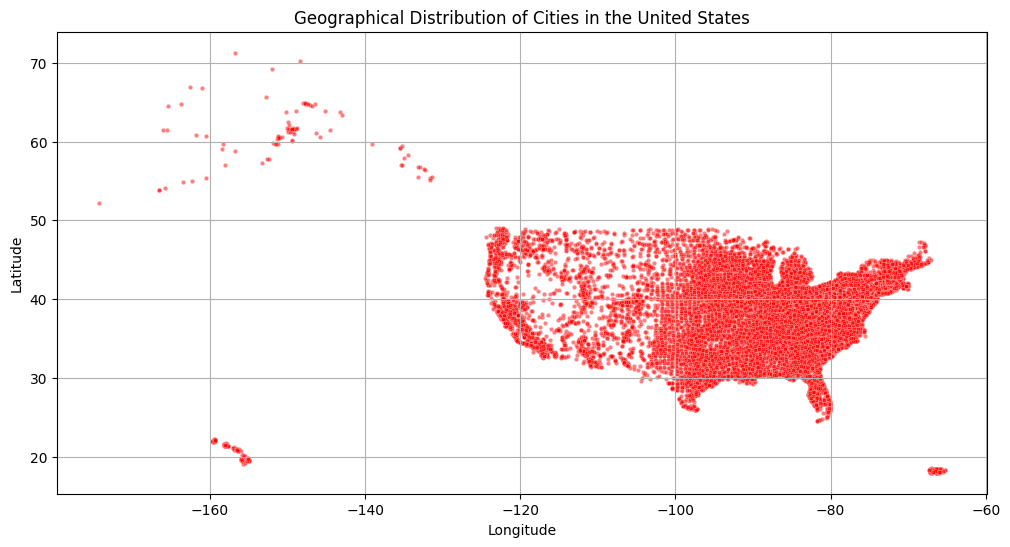

In [38]:
# Scatter plot of city locations in the U.S.
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_us["longitude"], y=df_us["latitude"], alpha=0.5, s=10, color="red")

# Labels and title
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Distribution of Cities in the United States")
plt.grid(True)

plt.show()


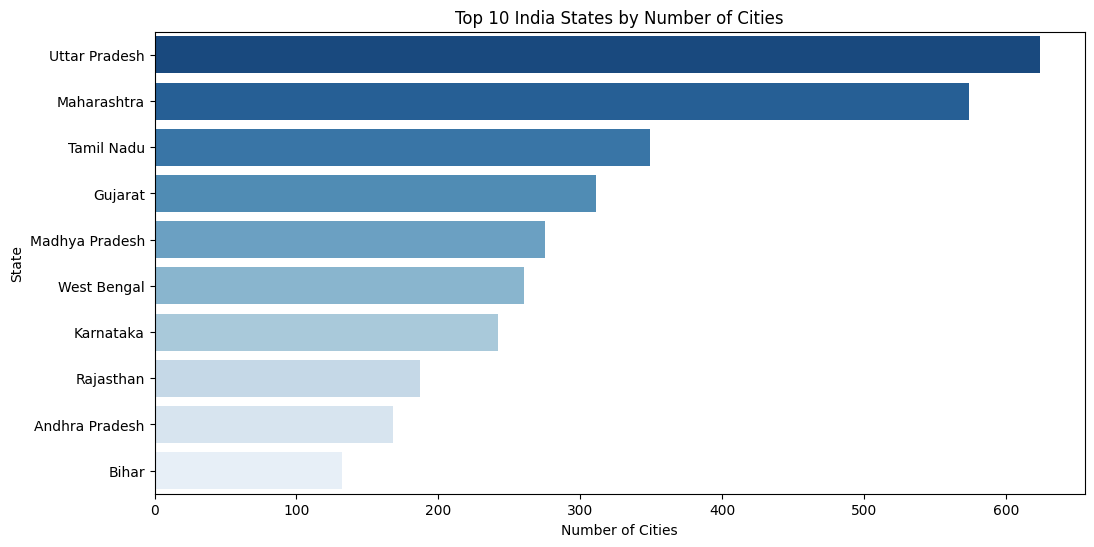

Uttar Pradesh     624
Maharashtra       574
Tamil Nadu        349
Gujarat           311
Madhya Pradesh    275
West Bengal       260
Karnataka         242
Rajasthan         187
Andhra Pradesh    168
Bihar             132
Name: state_name, dtype: int64

In [39]:
# Filter data for  India
df_ind = dataset[dataset["country_name"] == "India"]

# Count the number of cities per state
top_states = df_ind["state_name"].value_counts().head(10)

# Plot the top states by city count
plt.figure(figsize=(12, 6))
sns.barplot(x=top_states.values, y=top_states.index, palette="Blues_r")
plt.xlabel("Number of Cities")
plt.ylabel("State")
plt.title("Top 10 India States by Number of Cities")
plt.show()

# Display the top states count
top_states


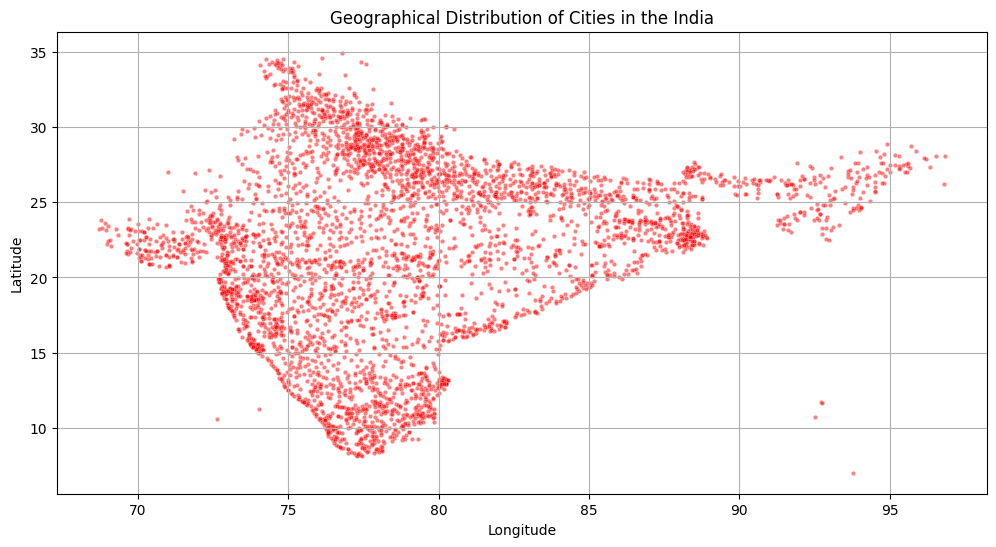

In [40]:
# Scatter plot of city locations in India
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_ind["longitude"], y=df_ind["latitude"], alpha=0.5, s=10, color="red")

# Labels and title
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Distribution of Cities in the India")
plt.grid(True)

plt.show()
